In [437]:
# Imports
import os
import pandas as pd
import re
import string
import matplotlib.pyplot as plt

from nltk import word_tokenize
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [438]:
# Creamos el array de textos y el array de categorias
x=[]
y=[]

In [439]:
# Cargamos el dataset
for cat in os.listdir('../newspaper-articles-main/'):
    for txt in os.listdir('../newspaper-articles-main/'+cat+'/'):
        with open ('../newspaper-articles-main/'+cat+'/'+txt, encoding = 'utf8') as f:
            x.append(f.read())
            y.append(cat)

In [440]:
# Mostramos el array de textos
x

['Titulo\n####\nLa despoblación en España vista desde un pueblo con 8 habitantes\n\nEntradilla\n####\nEn &#39;La Noche de COPE&#39; conocemos más a fondo cómo es vivir en pueblos aislados en España.\n\nCuerpo\n####\nA veces la tierra natal es hostil para encontrar trabajo, no hay niños suficientes para tener una escuela y el médico más cercano está en la capital de la provincia. Esos hijos que se marcharon y aquellos nietos que ya no volvieron, y poco a poco, el pueblo se fue quedando solo y vacío, dejando a los lugareños más longevos aferrarse ala tierra que les vio nacer.Hoy en \'La Noche de COPE\' hablamos de la despoblación en España. Por un lado la mayoría de las ciudades ven que su población crece de forma pujante y por otro, hay una España en decadencia, que se ha dejado por el camino un cuarto de millón de habitantes desde 2008.Reivindicamos la vida rural en España. Nos vamos hasta Guadalajara, concretamente a Mazarete. “Es un pueblo pequeño, con ocho vecinos”, cuenta la vecina

In [441]:
y

['Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion',
 'No Despoblacion']

In [442]:
# Pasamos el array de categorias a valores numericos
y_num=[]
value_des = 0
value_nodes = 0
for i in y:
    if i == 'Despoblacion':
        value_des+=1
        y_num.append(0)
    else:
        y_num.append(1)
        value_nodes+=1

In [443]:
# Mostramos el array de categorias por numero
y_num

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

<BarContainer object of 2 artists>

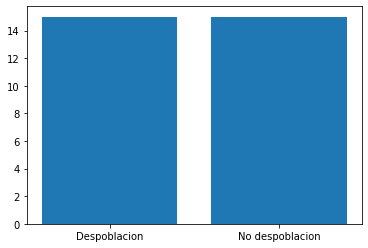

In [444]:
# Mostramos numero de textos por categoria
names = ['Despoblacion', 'No despoblacion']
values = [value_des, value_nodes]
plt.bar(names, values)

In [445]:
# Proceso de limpieza del array de textos
spanish_stemmer = SnowballStemmer('spanish')
corpus = []
for texto in x:
    clean_text = re.sub("[%s]" % re.escape(string.punctuation), " ", texto)
    clean_text= clean_text.lower()
    clean_text = re.sub('\w*\d\w*', ' ', clean_text)
    tokenized = word_tokenize(clean_text)
    for j in range(len(tokenized)):
        tokenized[j]=format(spanish_stemmer.stem(tokenized[j]))
    stemmed = ' '.join(tokenized)
    corpus.append(stemmed)

In [446]:
# Cargamos el texto de stop words en castellano, lo mostramos
with open('../stopword.txt', 'r') as file:
    my_stopwords=[file.read().replace('\n', ',')]
print(my_stopwords)

['0,1,2,3,4,5,6,7,8,9,_,a,actualmente,acuerdo,adelante,ademas,ademÃ¡s,adrede,afirmÃ³,agregÃ³,ahi,ahora,ahÃ\xad,al,algo,alguna,algunas,alguno,algunos,algÃºn,alli,allÃ\xad,alrededor,ambos,ampleamos,antano,antaÃ±o,ante,anterior,antes,apenas,aproximadamente,aquel,aquella,aquellas,aquello,aquellos,aqui,aquÃ©l,aquÃ©lla,aquÃ©llas,aquÃ©llos,aquÃ\xad,arriba,arribaabajo,asegurÃ³,asi,asÃ\xad,atras,aun,aunque,ayer,aÃ±adiÃ³,aÃºn,b,bajo,bastante,bien,breve,buen,buena,buenas,bueno,buenos,c,cada,casi,cerca,cierta,ciertas,cierto,ciertos,cinco,claro,comentÃ³,como,con,conmigo,conocer,conseguimos,conseguir,considera,considerÃ³,consigo,consigue,consiguen,consigues,contigo,contra,cosas,creo,cual,cuales,cualquier,cuando,cuanta,cuantas,cuanto,cuantos,cuatro,cuenta,cuÃ¡l,cuÃ¡les,cuÃ¡ndo,cuÃ¡nta,cuÃ¡ntas,cuÃ¡nto,cuÃ¡ntos,cÃ³mo,d,da,dado,dan,dar,de,debajo,debe,deben,debido,decir,dejÃ³,del,delante,demasiado,demÃ¡s,dentro,deprisa,desde,despacio,despues,despuÃ©s,detras,detrÃ¡s,dia,dias,dice,dicen,dicho,dieron,difer

In [447]:
# Creamos Matrix TF-IDF aplicando nuestras stop words y la mostramos
cv_tfidf = TfidfVectorizer(analyzer='word', stop_words = my_stopwords)
X_tfidf = cv_tfidf.fit_transform(corpus).toarray()
pd.DataFrame(X_tfidf, columns=cv_tfidf.get_feature_names())

/home/juan/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['actualmente', 'acuerdo', 'adelante', 'ademas', 'ademã', 'adiã³', 'adrede', 'afirmã³', 'agregã³', 'ahi', 'ahora', 'ahã', 'ais', 'al', 'algo', 'alguna', 'algunas', 'alguno', 'algunos', 'algãºn', 'alli', 'allã', 'alrededor', 'alã³', 'ambos', 'amos', 'ampleamos', 'an', 'antano', 'antaã', 'ante', 'anterior', 'antes', 'apenas', 'aproximadamente', 'aquel', 'aquella', 'aquellas', 'aquello', 'aquellos', 'aqui', 'aquã', 'arriba', 'arribaabajo', 'as', 'asegurã³', 'asi', 'asã', 'atras', 'aun', 'aunque', 'ayer', 'aã', 'aãºn', 'bajo', 'bamos', 'bastante', 'bien', 'breve', 'buen', 'buena', 'buenas', 'bueno', 'buenos', 'cada', 'casi', 'cerca', 'cierta', 'ciertas', 'cierto', 'ciertos', 'cinco', 'claro', 'comentã³', 'como', 'con', 'conmigo', 'conocer', 'conseguimos', 'conseguir', 'considera', 'consider

,abandon,abandonadass,abarc,abiert,aboc,abog,abrir,abrum,absolu,abstinent,...,xiaomi,xxi,ya,yend,yo,zamor,zaragoz,zen,zombi,zon
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.046084,0.000000,0.000000,0.000000,0.000000,0.00000,0.048022,0.000000
1,0.020603,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.030977,0.000000,0.000000,0.000000,0.00000,0.000000,0.105896
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.047559
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.047006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.055368,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.098621
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.046304
6,0.037754,0.028382,0.000000,0.000000,0.000000,0.000000,0.000000,0.028382,0.000000,0.000000,...,0.000000,0.028382,0.027236,0.000000,0.000000,0.025305,0.000000,0.00000,0.000000,0.064684
7,0.000000,0.000000,0.000000,0.026067,0.000000,0.000000,0.028528,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.026067,0.000000,0.026067,0.00000,0.000000,0.000000
8,0.036114,0.000000,0.054297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.052105,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.061115,0.000000,0.000000,0.00000,0.000000,0.000000


In [448]:
# Dividimos nuestros datos en train/test al 80/20
# y mostramos que categorias hay en cada grupo
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_num, test_size=0.2, random_state=0)
print(y_train)
print(y_test)

[1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0]
[0, 1, 0, 0, 1, 1]


In [449]:
# Para los modelos que queremos probar: entrenamos, testeamos, mostramos la accuracy,
# la classification reoprt y la confusion matrix
model = DecisionTreeClassifier(random_state=1)
grid_param = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}
gd_sr = GridSearchCV(estimator=model,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=3,
                     n_jobs=-1)
gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print('Accuracy train/validation: ', best_result)
prediction=gd_sr.predict(X_test)
acc = accuracy_score(y_test, prediction)
print("Accuracy test: " + str(acc) + '\n')
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

{'criterion': 'gini', 'splitter': 'random'}
Accuracy train/validation:  0.75
Accuracy test: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

[[3 0]
 [0 3]]


Text(0.5, 15.0, 'Predicted')

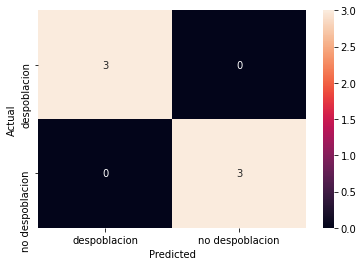

In [450]:
# Mostramos la confusion matrix con mapa de calor
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, prediction)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['despoblacion','no despoblacion'], yticklabels=['despoblacion','no despoblacion'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [451]:
# Clasificamos textos al momento
texts = ["Los pueblos de la españa vaciada",
         "El capitan tsubasa marca un gol para el equipo de japon",
         "trump deja la casa blanca",
         "beyonce saca un nuevo disco y es exito en asia",
         "el pueblo de mi abuela no tiene gente"]

# Proceso de limpieza del array de textos
spanish_stemmer = SnowballStemmer('spanish')
corpus = []
for texto in texts:
    clean_text = re.sub("[%s]" % re.escape(string.punctuation), " ", texto)
    clean_text= clean_text.lower()
    clean_text = re.sub('\w*\d\w*', ' ', clean_text)
    tokenized = word_tokenize(clean_text)
    for j in range(len(tokenized)):
        tokenized[j]=format(spanish_stemmer.stem(tokenized[j]))
    stemmed = ' '.join(tokenized)
    corpus.append(stemmed)

text_features = cv_tfidf.transform(corpus)
predictions = gd_sr.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(predicted))
  print("")


"Los pueblos de la españa vaciada"
  - Predicted as: '0'

"El capitan tsubasa marca un gol para el equipo de japon"
  - Predicted as: '1'

"trump deja la casa blanca"
  - Predicted as: '1'

"beyonce saca un nuevo disco y es exito en asia"
  - Predicted as: '1'

"el pueblo de mi abuela no tiene gente"
  - Predicted as: '0'

